In [1]:

from sympy import sympify, Symbol
import numpy as np

# funzione per importare i dati in formato .txt sostituire dove trova l'espressione r con valore del parametro e restituire la matrice 
def import_and_substitute_matrix(file_path, parameter_value):
    r = Symbol('r')
    matrix = []

    with open(file_path, "r") as file:
        lines = file.readlines()

    for line in lines:
        row = []
        for entry in line.strip().split(','): #ci funge da separatore ed elimina gli spazi superflui (usiamo la virgola come elemento di sep)
            expr = sympify(entry)
            value = float(expr.subs(r, parameter_value))
            row.append(value)
        matrix.append(row)

    return np.array(matrix)


In [2]:
# costruzione della funzione che calcola response_function (prendo spunto da come fatto per il correlatore) 
# in questo modo più semplice il plotting 

def compute_response_function(J, indices):
    entry_values = {}  # uso il dizionario per salvare ed organizzare i dati

    # genera tutte le combinazioni con gli indici considerando che sono di 2 tipologie 
    index_pairs = list(product(indices, repeat=2))

    for t in time:
        exp_matrix = expm(J * t)  # calcola response function nella fase lineare !
        
        for i, j in index_pairs:
            if (i, j) not in entry_values: # considero il caso in cui non sia presente la coppia (cioè consideriamo la loro aggiunta)
                entry_values[(i, j)] = []  # inizializza la lista relativa alla coppia indicata se non già presente 
                entry_values[(i, j+200)] = []
                entry_values[(i+200, j)] = []
                entry_values[(i+200, j+200)] = []
            entry_values[(i, j)].append(exp_matrix[i-1, j-1])  # prendo gli elementi ad indici diversi 
            entry_values[(i, j+200)].append(exp_matrix[i-1, j+199])
            entry_values[(i+200, j)].append(exp_matrix[j+199, i-1])
            entry_values[(i+200, j+200)].append(exp_matrix[i+199, j+199])

    return entry_values

# controllare come vengono raddoppiati le 

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from scipy.linalg import expm # serve ad importare esponenziale di matrice 
# Parameters
N = 200
r = 50
p = 0.2
V = 1e6
dt = 0.01
T = 5
num_steps = int(T / dt)
t1 = np.linspace(0, T, num_steps)
Jacobian = import_and_substitute_matrix("C:/Users/fiasc/OneDrive/Desktop/CaseB_Laplacian_Jacobian.txt", r)

# qui siamo in una configurazione lineare LINEARE 
analytic_response_functions = []
for t in t1:
        analytic_response_functions.append(expm(Jacobian * t))  # Compute response matrix

analytic_response_functions = np.array(analytic_response_functions)

In [4]:
# analisi della dinamica 
# costruzione delle funzioni della dinamica
import numpy as np 
# costruzione della funzione di attivazione 
def F(s) : 
    return 1/(1+np.exp(-s))

# prima si necessita di una costruzione della funzione per la dinamica 

# qua andiamo a studiare la dinamica NON LINEARE 
def simulate_dynamics(N):
    x = np.zeros((num_steps, N)) #costruisco le serie temporali, qua vogliamo da un lato il tempo dall'altro le regioni 
    y = np.zeros((num_steps, N))
    
    # partenza dal punto fisso 
    x[0, :] = np.random.rand(N)
    y[0, :] = np.random.rand(N)
    
    for t in range(1, num_steps):
        for i in range(N):
            s_x = -r * (y[t-1, i] - p) + np.sum(L[i, :] * x[t-1, :]) - np.sum(L[i, :] * y[t-1, :])   #stimolo lungo x 
            s_y = r * (x[t-1, i] - 1 + p) + np.sum(L[i, :] * x[t-1, :]) - np.sum(L[i, :] * y[t-1, :])
        
            F_sx = 2 * (1 - p) * F(s_x)  # descrizione della funzione di attivazione 
            F_sy = 2 * p * F(s_y)
        
            xi_x = np.random.normal(0, 1)  
            xi_y = np.random.normal(0, 1)  
        
            x_noise = (1 / np.sqrt(V)) * np.sqrt(max(0, x[t-1, i] + F_sx)) * xi_x * np.sqrt(dt) # rumore (termine centrale mima l'attività neurale)
            y_noise = (1 / np.sqrt(V)) * np.sqrt(max(0, y[t-1, i] + F_sy)) * xi_y * np.sqrt(dt)
            # aumentando la attività del neurone si porta dietro più rumore (vedi referenza linear application in  ) 
        
            x[t, i] = x[t-1, i] + dt * (F_sx - x[t-1, i]) + x_noise #ancora siamo discreti 
            y[t, i] = y[t-1, i] + dt * (F_sy - y[t-1, i]) + y_noise
            # in una equazione di langevin la presenza di una funzione di attivazione non lineare è necessaria per lo studio della dinamica 
    return x, y


In [5]:
# costruzione della funzione che calcola response_function (prendo spunto da come fatto per il correlatore) 
# in questo modo più semplice il plotting 

#dinamica riferita all'intero sistema in condizioni LINEARI 
def compute_response_function(J, indices):
    entry_values = {}  # uso il dizionario per salvare ed organizzare i dati

    # genera tutte le combinazioni con gli indici considerando che sono di 2 tipologie 
    index_pairs = list(product(indices, repeat=2))

    for t in time:
        exp_matrix = expm(J * t)  # calcola response function
        
        for i, j in index_pairs:
            if (i, j) not in entry_values: # considero il caso in cui non sia presente la coppia
                entry_values[(i, j)] = []  # inizializza la lista relativa alla coppia indicata se non già presente 
                entry_values[(i, j+200)] = []
                entry_values[(i+200, j)] = []
                entry_values[(i+200, j+200)] = []
            entry_values[(i, j)].append(exp_matrix[i-1, j-1])  # prendo gli elementi ad indici diversi 
            entry_values[(i, j+200)].append(exp_matrix[i-1, j+199])
            entry_values[(i+200, j)].append(exp_matrix[j+199, i-1])
            entry_values[(i+200, j+200)].append(exp_matrix[i+199, j+199])

    return entry_values

In [6]:

# dinamica intera NON LINEARE ! ( qua verifichiamo la risposta del sistema secondo modello di wilson cowan ) 
def simulate_dynamics_network_response(N, indices, epsilon, index_perturbation):
    x = np.ones((num_steps, N)) * (1 - p) #riferito ad un punto in cui la dinamica deve arrestarsi (facciamo un riferimento al punto fisso)
    y = np.ones((num_steps, N)) * p

    # questo mi serve per fare uno storing 
    x_subset = np.ones((num_steps, len(indices))) * (1 - p)  # idea è di inizializzare con il punto fisso così da avere modo di ricostruire la dinamica come effetto esclusivo della perturbazione 
    y_subset = np.ones((num_steps, len(indices))) * p

    # qua seleziono il nodo da andare a perturbare 
    if 1 <= index_perturbation <= 200: # considero che ci sono vari indici del sistema, ne recupero uno compreso fra 1 e 200
        x[0, index_perturbation-1] += epsilon
    elif 201 <= index_perturbation <= 400: # gli altri indici arrivano da 201 ad 400 andranno a finire in y 
        y[0, index_perturbation-1] += epsilon
    else:
        raise ValueError(f"Index {index} is out of the valid range (1-400)")  

    #si va a lanciare la dinamica del sistema 
    for t in range(1, num_steps):
        for idx, i in enumerate(indices):
            # idx: index in the indices list (e.g., 0, 1, 2 for [10, 50, 100])
            # i: the value at that index (e.g., 10, 50, 100)
            # Perform calculations using i (the actual index, like 10, 50, etc.)

            # ricostruisco la stimolazione nei casi indicati dalla letteratura (controllare a quale riferisce) 
            s_x = -r * (y[t-1, i-1] - p) + np.sum(L[i-1, :] * x[t-1, :]) - np.sum(L[i-1, :] * y[t-1, :])
            s_y = r * (x[t-1, i-1] - 1 + p) + np.sum(L[i-1, :] * x[t-1, :]) - np.sum(L[i-1, :] * y[t-1, :])

            # in entrambi i casi raggiungiamo lo stato x, y in base alla attivazione della funzione stessa !
            F_sx = 2 * (1 - p) * F(s_x)
            F_sy = 2 * p * F(s_y)

            # la vediamo come dal punto di vista "discreto" una derivazione discreta 
            x[t, i-1] = x[t-1, i-1] + dt * (F_sx - x[t-1, i-1])
            y[t, i-1] = y[t-1, i-1] + dt * (F_sy - y[t-1, i-1])

            # Store the values of x and y for the selected indices at time step t
            x_subset[t, idx] = x[t, i-1]
            y_subset[t, idx] = y[t, i-1]
    
    return x_subset, y_subset



In [7]:

#importo i dati 
data = np.loadtxt("C:/Users/fiasc/OneDrive/Desktop/Tesona/full_connectome_schaefer_200_unthreshold.txt")



#estrazione autovalori ed autovettori 
eigvals, eigvecs= np.linalg.eig(data)
data_norm = data/np.max(np.real(eigvals))

#calcolo della matrice laplaciana: ci conferisce la struttura matriciale avendo noramlizzato non abbiamo strenght
L= -np.diag(np.sum(data_norm, axis=1)) + data_norm  #controllare se la aggiunta è corretta per migliorare la visibilità
#print(L)

In [8]:
# Definisco il range degli indici da osservare: qui considero tutti i neuroni (da 1 a N)
indices = np.arange(1, N + 1)  # NB: uso indici 1-based perché poi sottraggo 1 nel codice
index_perturbation = 2
epsilons = [0.001, 0.01, 0.1, 1]  # perturbazioni che imponiamo al sistema
distanze_per_epsilon = []

for eps in epsilons:
    # Risposta non lineare (dove stabiliamo una risposta per cui abbiamo separazione neurone eccitatore ed inibitore)
    x_nonlin, y_nonlin = simulate_dynamics_network_response(N, indices, eps, index_perturbation)

    # Stato iniziale per la dinamica lineare
    delta0 = np.zeros(2 * N)
    delta0[index_perturbation - 1] = eps

    # Risposta lineare (via propagatore/matrice esponenziale)
    x_linear = []
    y_linear = []
    for Phi_t in analytic_response_functions:
        delta_t = Phi_t @ delta0 # delta0 riferito alla condizione iniziale 
        x_linear.append((1 - p) + delta_t[:N][np.array(indices) - 1])
        y_linear.append(p + delta_t[N:][np.array(indices) - 1])
    x_linear = np.array(x_linear)
    y_linear = np.array(y_linear)

    # Costruisco vettori combinati (x + y) e calcolo distanza L2 tra lineare e non lineare
    X_nonlin = np.hstack((x_nonlin, y_nonlin))
    X_linear = np.hstack((x_linear, y_linear))
    distanza = np.linalg.norm(X_nonlin - X_linear)

    distanze_per_epsilon.append(distanza)

# Stampa dei risultati
for e, d in zip(epsilons, distanze_per_epsilon):
    print(f"Epsilon={e:.1e}, Distanza L2 totale = {d:.4f}")


Epsilon=1.0e-03, Distanza L2 totale = 0.0025
Epsilon=1.0e-02, Distanza L2 totale = 0.0246
Epsilon=1.0e-01, Distanza L2 totale = 0.6347
Epsilon=1.0e+00, Distanza L2 totale = 7.0899


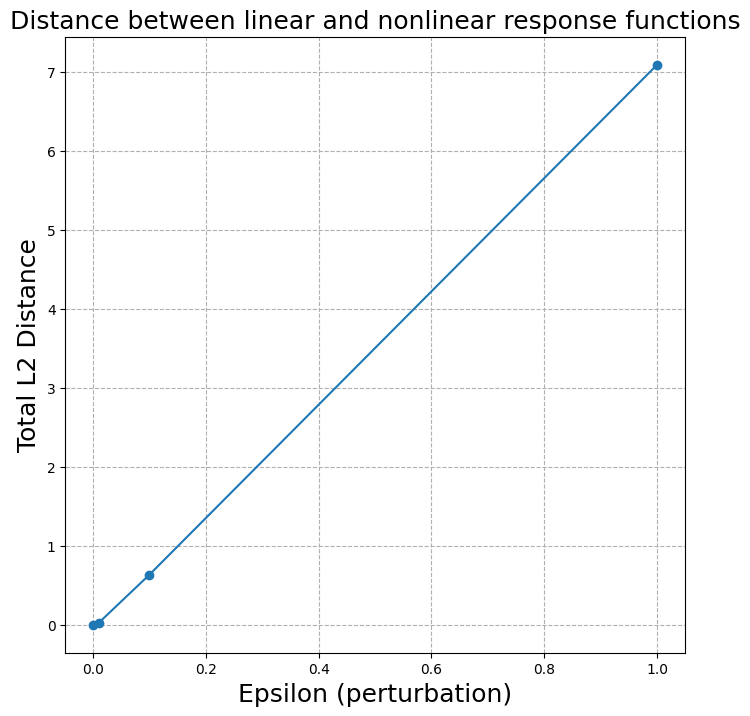

In [9]:

# Plot distanza vs epsilon su scala lineare ( non mostra la distanza fra le due infatti attorno allo 0 siamo pressocchè simili )

plt.figure(figsize=(8,8))
plt.plot(epsilons, distanze_per_epsilon, marker='o')
plt.xlabel('Epsilon (perturbation)', fontsize=18)
plt.ylabel('Total L2 Distance', fontsize=18)
plt.title('Distance between linear and nonlinear response functions', fontsize=18) # idea di base è la valutazione del plotting delle distanze fra le due quantità
plt.grid(True, which='both', linestyle='--')
plt.show()

# considerazioni: per piccoli epsilon verifichiamo la bontà delle due essere praticamente coincidenti ! 

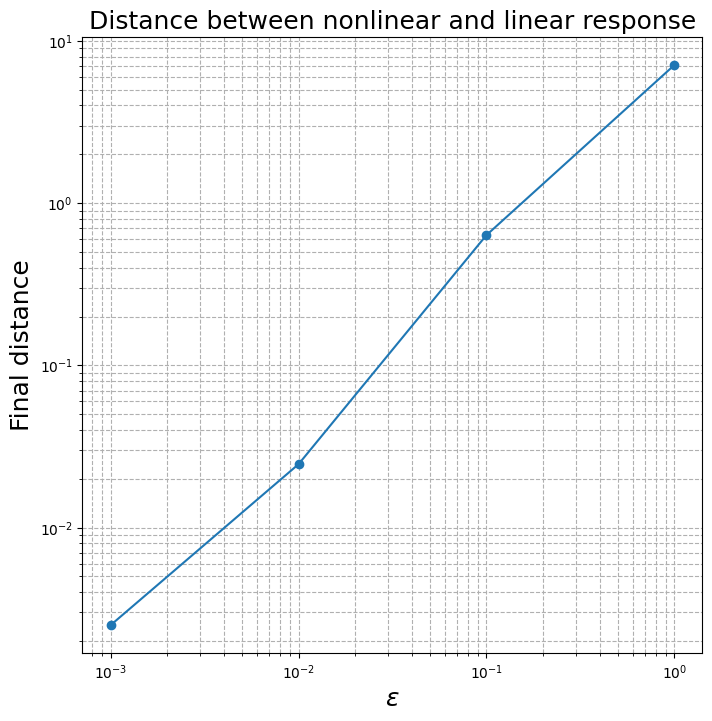

In [10]:
# per mettere in luce la bassa distanza in funzione della perturbazione
# Plot distanza vs epsilon su scala log-log
plt.figure(figsize=(8,8))
plt.loglog(epsilons, distanze_per_epsilon, marker='o') # scala logaritmica sia su asse x che y, ( potrei focalizzare solo su scala y )
plt.xlabel('$\epsilon$', fontsize=18)
plt.ylabel('Final distance', fontsize=18)
plt.title('Distance between nonlinear and linear response', fontsize=18)
plt.grid(True, which='both', linestyle='--')
plt.show()

In [22]:
# da analizzare il sistema a network e poi ricostruirlo attraverso la identificazione nodo del sistema- network !

from nilearn import datasets
atlas = datasets.fetch_atlas_schaefer_2018(n_rois=200, yeo_networks=7) # qua importo la libreria ed il dataset di riferimento 
labels = atlas.labels # dichiaro le etichette da cui estraggo infomrmazioni di appartenenza ! (questo è un array) 

#labels

[get_dataset_dir] Dataset found in C:\Users\fiasc\nilearn_data\schaefer_2018


In [23]:
# qua abbiamo costruito dizionario per la classificazione nodo network 
from collections import defaultdict

subnetworks = defaultdict(list)

for idx, label in enumerate(labels):
    label_str = str(label)  # questo perchè split non sopporta dati int o float (numeri) è un metodo che funziona su stringhe 
    parts = label_str.split('_')
    if len(parts) >= 3:
        subnet_name = parts[2]
    else:
        subnet_name = 'Unknown'
    subnetworks[subnet_name].append(idx)


In [24]:
# adesso dobbiamo valutare una parturbazione su uno dei network ed successiva analisi perturbativa

from nilearn import plotting
data = np.loadtxt("C:/Users/fiasc/OneDrive/Desktop/Tesona/full_connectome_schaefer_200_unthreshold.txt")

node_coords = plotting.find_parcellation_cut_coords(labels_img=atlas.maps) # coordinate 
view = plotting.view_connectome(
    data,
    node_coords,
    edge_threshold="85%",
    node_size=5.0,
)
#view.open_in_browser()
# oppure view.save_as_html("network.html")

In [30]:
# lista su cui lavoriamo !
list(subnetworks.keys())

['Vis',
 'SomMot',
 'DorsAttn',
 'SalVentAttn',
 'Limbic',
 'Cont',
 'Default',
 0,
 '1']

In [25]:
# perturbazione random su network ed nodo 
import random 

# scelta casuale del network 
perturbed_net = random.choice(list(subnetworks.keys())) # qua seleziono la chiave quindi il network da perturbare ( estraggo solo una serie di chiavi )

# scelta casuale del nodo all'interno 
nodes = subnetworks[perturbed_net] # tutti i nodi associati alla scelta del network 
perturbed_node = random.choice(nodes)

epsilon = 0.01 # diamo questo impulso come perturbazione 
indices_all = list(range(N))
x, y = simulate_dynamics_network_response(N, indices_all, epsilon, perturbed_node + 1)

# elimino la presenza del network che andiamo a perturbare, quindi seleziono i nodi sopravvissuti a questa fase e ne valuto la risposta rispetto al punto fisso
other_nodes = [idx for key, nodes in subnetworks.items() if key != perturbed_net for idx in nodes]
# qua è strutturato tipo dizionario quindi accesso tramite items che ci fornisce la coppia chiave e valore

x_other = x[:, other_nodes] # time lungo asse 0 ed altre regioni lungo asse 1 
y_other = y[:, other_nodes]

# Risposta effettiva rispetto al punto fisso
resp_x = (x_other - (1 - p)) / epsilon
resp_y = (y_other - p) / epsilon

# Media della risposta nei nodi non-perturbati
mean_resp_x = np.mean(resp_x, axis=1)
mean_resp_y = np.mean(resp_y, axis=1)


In [29]:
# studiare da qua cosa succede 
# l'idea è di valutare la risposta del sistema al variare della perturbazione 

import numpy as np
import matplotlib.pyplot as plt
import random


# qua stiamo generalizzando il problema considerando tutti i network 
# Parametri
r = 50
N = L.shape[0]
epsilon_values = np.array([0.001, 0.01, 0.1, 1])  # valori epsilon
num_eps = len(epsilon_values)

# Costruzione tempo
time = np.arange(num_steps) * dt

# Scegli subnetwork da perturbare e un nodo casuale
perturbed_net = random.choice(list(subnetworks.keys()))
perturbed_nodes = subnetworks[perturbed_net]
perturbed_node = random.choice(perturbed_nodes)

# Tutti gli altri nodi, list comprenshion per la costruzione degli altri nodi con condizione che la chiave debba essere diversa dal network perturbato 
other_nodes = [idx for key, nodes in subnetworks.items() if key != perturbed_net for idx in nodes]
# qua facciamo riferimento ad nodi in altri network 

# Dizionario per salvare risposta media per ogni epsilon
response_functions_network = {}

# Loop sugli epsilon (qua usiamo enumerate per svolgere doppio loop sia su i che eps)
for i, eps in enumerate(epsilon_values):
    # Simula la dinamica perturbando il nodo
    x, y = simulate_dynamics_network_response(N, list(range(N)), eps, perturbed_node + 1)
    
    # Calcola risposta normalizzata, riferendosi alla dinamica dei nodi eccitatori ed inibitori 
    x_other = x[:, other_nodes]
    y_other = y[:, other_nodes]
    
    response_x = (x_other - (1 - p)) / eps # qua stiamo valutando la distanza dal punto fisso per x ed y (normalizzo per epsilon )
    response_y = (y_other - p) / eps
    
    # Media sugli altri subnetworks
    mean_response_x = np.mean(response_x, axis=1)
    mean_response_y = np.mean(response_y, axis=1)
    
    # Salva nel dizionario
    response_functions_network[eps] = {
        'x': mean_response_x,
        'y': mean_response_y
    }
